In [1]:
import os

import numpy as np
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SPAM text message 20170820 - Data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:ylabel='Category'>

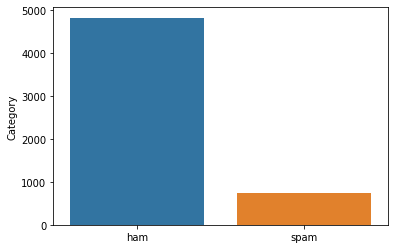

In [4]:
sns.barplot(df['Category'].value_counts().index, df['Category'].value_counts())

In [5]:
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
X = df.drop(['Category'], axis=1)
y = df['Category']
print("X --", X.shape, "\ny --", y.shape)

X -- (5572, 1) 
y -- (5572,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, test_X, y_train, test_y = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

train_X, val_X, train_y, val_y = train_test_split(X_train,y_train,test_size=0.15,random_state=0, stratify=y_train)

print("train_X shape: ", train_X.shape)
print("train_y shape: ", train_y.shape)
print("val_X shape: ", val_X.shape)
print("val_y shape: ", val_y.shape)
print("test_X shape: ", test_X.shape)
print("test_y shape: ", test_y.shape)

train_X shape:  (3788, 1)
train_y shape:  (3788,)
val_X shape:  (669, 1)
val_y shape:  (669,)
test_X shape:  (1115, 1)
test_y shape:  (1115,)


In [8]:
train_X['msg_lower'] = train_X['Message'].str.lower()
train_X.head()

,Message,msg_lower
927,But I'm on a diet. And I ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...
4581,Hi ....My engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...
2986,No break time one... How... I come out n get m...,no break time one... how... i come out n get m...
1237,How much are we getting?,how much are we getting?
4107,K then 2marrow are you coming to class.,k then 2marrow are you coming to class.


In [9]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

train_X["msg_wo_url"] = train_X["msg_lower"].apply(lambda text: remove_urls(text))
train_X.head()

,Message,msg_lower,msg_wo_url
927,But I'm on a diet. And I ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...
4581,Hi ....My engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...
2986,No break time one... How... I come out n get m...,no break time one... how... i come out n get m...,no break time one... how... i come out n get m...
1237,How much are we getting?,how much are we getting?,how much are we getting?
4107,K then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k then 2marrow are you coming to class.


In [10]:
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
print("; ".join(stopwords.words('english')))

i; me; my; myself; we; our; ours; ourselves; you; you're; you've; you'll; you'd; your; yours; yourself; yourselves; he; him; his; himself; she; she's; her; hers; herself; it; it's; its; itself; they; them; their; theirs; themselves; what; which; who; whom; this; that; that'll; these; those; am; is; are; was; were; be; been; being; have; has; had; having; do; does; did; doing; a; an; the; and; but; if; or; because; as; until; while; of; at; by; for; with; about; against; between; into; through; during; before; after; above; below; to; from; up; down; in; out; on; off; over; under; again; further; then; once; here; there; when; where; why; how; all; any; both; each; few; more; most; other; some; such; no; nor; not; only; own; same; so; than; too; very; s; t; can; will; just; don; don't; should; should've; now; d; ll; m; o; re; ve; y; ain; aren; aren't; couldn; couldn't; didn; didn't; doesn; doesn't; hadn; hadn't; hasn; hasn't; haven; haven't; isn; isn't; ma; mightn; mightn't; mustn; must

In [11]:
def remove_stopwords(text):
    """ custom function to remove the stopwords """
    return " ".join([word for word in str(text).split() if word not in stopword])

train_X['msg_wo_stopword'] = train_X['msg_wo_url'].apply(lambda text :remove_stopwords(text))
train_X.head()

,Message,msg_lower,msg_wo_url,msg_wo_stopword
927,But I'm on a diet. And I ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,i'm diet. ate 1 many slices pizza yesterday. u...
4581,Hi ....My engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement fixd &lt;#&gt; th next mo...
2986,No break time one... How... I come out n get m...,no break time one... how... i come out n get m...,no break time one... how... i come out n get m...,break time one... how... come n get stuff fr ü?
1237,How much are we getting?,how much are we getting?,how much are we getting?,much getting?
4107,K then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k 2marrow coming class.


In [12]:
punc_to_remove = string.punctuation
print(punc_to_remove)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punc_to_remove))

train_X['msg_wo_punc'] = train_X['msg_wo_stopword'].apply(lambda text: remove_punctuation(text))
train_X.head()

,Message,msg_lower,msg_wo_url,msg_wo_stopword,msg_wo_punc
927,But I'm on a diet. And I ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,i'm diet. ate 1 many slices pizza yesterday. u...,im diet ate 1 many slices pizza yesterday ugh ...
4581,Hi ....My engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement fixd &lt;#&gt; th next mo...,hi my engagement fixd ltgt th next month know ...
2986,No break time one... How... I come out n get m...,no break time one... how... i come out n get m...,no break time one... how... i come out n get m...,break time one... how... come n get stuff fr ü?,break time one how come n get stuff fr ü
1237,How much are we getting?,how much are we getting?,how much are we getting?,much getting?,much getting
4107,K then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k 2marrow coming class.,k 2marrow coming class


In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

train_X["msg_stemmed"] = train_X["msg_wo_punc"].apply(lambda text: stem_words(text))
train_X.head()

,Message,msg_lower,msg_wo_url,msg_wo_stopword,msg_wo_punc,msg_stemmed
927,But I'm on a diet. And I ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,i'm diet. ate 1 many slices pizza yesterday. u...,im diet ate 1 many slices pizza yesterday ugh ...,im diet ate 1 mani slice pizza yesterday ugh i...
4581,Hi ....My engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement fixd &lt;#&gt; th next mo...,hi my engagement fixd ltgt th next month know ...,hi my engag fixd ltgt th next month know reall...
2986,No break time one... How... I come out n get m...,no break time one... how... i come out n get m...,no break time one... how... i come out n get m...,break time one... how... come n get stuff fr ü?,break time one how come n get stuff fr ü,break time one how come n get stuff fr ü
1237,How much are we getting?,how much are we getting?,how much are we getting?,much getting?,much getting,much get
4107,K then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k 2marrow coming class.,k 2marrow coming class,k 2marrow come class


In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

train_X["msg_lemmatized"] = train_X["msg_wo_punc"].apply(lambda text: lemmatize_words(text))
train_X.head()

,Message,msg_lower,msg_wo_url,msg_wo_stopword,msg_wo_punc,msg_stemmed,msg_lemmatized
927,But I'm on a diet. And I ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,but i'm on a diet. and i ate 1 too many slices...,i'm diet. ate 1 many slices pizza yesterday. u...,im diet ate 1 many slices pizza yesterday ugh ...,im diet ate 1 mani slice pizza yesterday ugh i...,im diet ate 1 many slice pizza yesterday ugh i...
4581,Hi ....My engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement has been fixd on &lt;#&g...,hi ....my engagement fixd &lt;#&gt; th next mo...,hi my engagement fixd ltgt th next month know ...,hi my engag fixd ltgt th next month know reall...,hi my engagement fixd ltgt th next month know ...
2986,No break time one... How... I come out n get m...,no break time one... how... i come out n get m...,no break time one... how... i come out n get m...,break time one... how... come n get stuff fr ü?,break time one how come n get stuff fr ü,break time one how come n get stuff fr ü,break time one how come n get stuff fr ü
1237,How much are we getting?,how much are we getting?,how much are we getting?,much getting?,much getting,much get,much getting
4107,K then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k then 2marrow are you coming to class.,k 2marrow coming class.,k 2marrow coming class,k 2marrow come class,k 2marrow coming class


In [16]:
train_X.drop(['Message', 'msg_lower', 'msg_wo_url', 'msg_wo_stopword', 'msg_wo_punc','msg_stemmed'], axis=1, inplace=True)

In [17]:
train = train_X.join(train_y)
train.head()

,msg_lemmatized,Category
927,im diet ate 1 many slice pizza yesterday ugh i...,0
4581,hi my engagement fixd ltgt th next month know ...,0
2986,break time one how come n get stuff fr ü,0
1237,much getting,0
4107,k 2marrow coming class,0


<AxesSubplot:ylabel='Category'>

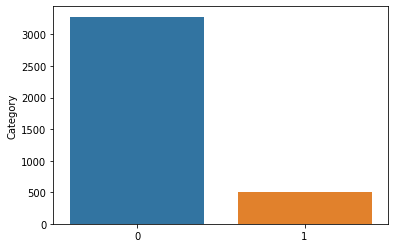

In [18]:
sns.barplot(train['Category'].value_counts().index, train['Category'].value_counts())

In [19]:
def preprocessing(df):
    df['msg_lower'] = df['Message'].str.lower()
    df["msg_wo_url"] = df["msg_lower"].apply(lambda text: remove_urls(text))
    df['msg_wo_stopword'] = df['msg_wo_url'].apply(lambda text :remove_stopwords(text))
    df['msg_wo_punc'] = df['msg_wo_stopword'].apply(lambda text: remove_punctuation(text))
    df["msg_lemmatized"] = df["msg_wo_punc"].apply(lambda text: lemmatize_words(text))
    df.drop(['Message', 'msg_lower', 'msg_wo_url', 'msg_wo_stopword', 'msg_wo_punc'], axis=1, inplace=True)
    return df

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=3500)

In [21]:
train_vector = bow.fit_transform(train_X['msg_lemmatized']).toarray()
train_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
val_X = preprocessing(val_X)
print(val_X.shape)
val_vector = bow.transform(val_X['msg_lemmatized']).toarray()
val_vector

(669, 1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
test_X = preprocessing(test_X)
print(test_X.shape)
test_vector = bow.transform(test_X['msg_lemmatized']).toarray()
test_vector

(1115, 1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB().fit(train_vector,train_y)

<AxesSubplot:>

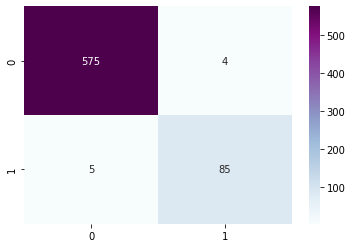

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

val_pred_nb = nb.predict(val_vector)
cm=confusion_matrix(val_y,val_pred_nb)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

<AxesSubplot:>

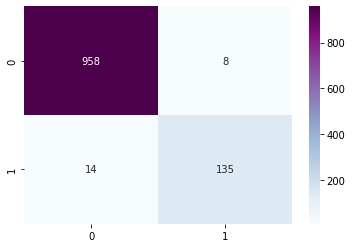

In [26]:
test_pred_nb = nb.predict(test_vector)
cm = confusion_matrix(test_y,test_pred_nb)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0).fit(train_vector,train_y)

<AxesSubplot:>

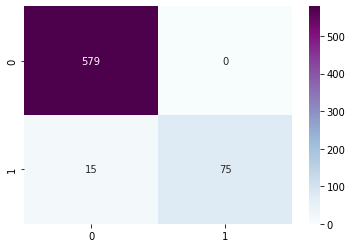

In [28]:
val_pred_rfc = rfc.predict(val_vector)
cm=confusion_matrix(val_y,val_pred_rfc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

<AxesSubplot:>

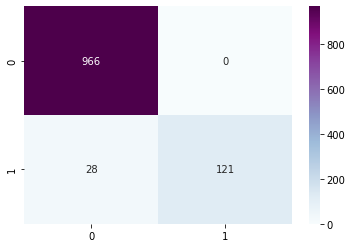

In [29]:
test_pred_rfc = rfc.predict(test_vector)
cm = confusion_matrix(test_y,test_pred_rfc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

In [30]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression().fit(train_vector,train_y)

<AxesSubplot:>

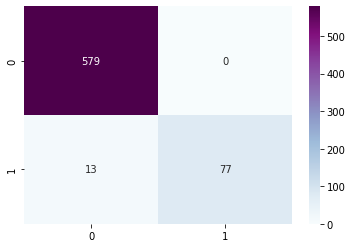

In [31]:
val_pred_lrc = lrc.predict(val_vector)
cm=confusion_matrix(val_y,val_pred_lrc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

<AxesSubplot:>

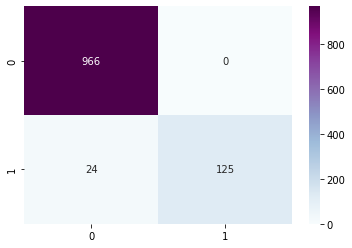

In [32]:
test_pred_lrc = lrc.predict(test_vector)
cm = confusion_matrix(test_y,test_pred_lrc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')